# Golden Globe Awards Analysis

The Golden Globe Awards are accolades bestowed by the 93 members of the Hollywood Foreign Press Association beginning in January 1944, recognizing excellence in film, both American and International, and the American television.

The annual ceremony at which the awards are presented, is a major part of the film industry's awards season, which culminates each year in the Academy Awards. The eligibility period for the Golden Globes corresponds to the calendar year (i.e. January 1 through December 31). The 77th Golden Globe Awards, honoring the best in film and television in 2019, were held on January 5, 2020.

In this notebook I have performed Exploratory Data Analysis on the Golden Globe Awards dataset and tried to identify various trends and features from the given dataset.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading dataset

In [2]:
df = pd.read_csv("golden_globe_awards.csv")
df.head()

,year_film,year_award,ceremony,category,nominee,film,win
0,1943,1944,1,Best Performance by an Actress in a Supporting...,Katina Paxinou,For Whom The Bell Tolls,True
1,1943,1944,1,Best Performance by an Actor in a Supporting R...,Akim Tamiroff,For Whom The Bell Tolls,True
2,1943,1944,1,Best Director - Motion Picture,Henry King,The Song Of Bernadette,True
3,1943,1944,1,Picture,The Song Of Bernadette,NaN,True
4,1943,1944,1,Actress In A Leading Role,Jennifer Jones,The Song Of Bernadette,True


The dataset contains all the information about the Golden Globe Award from the year 1944 when it's first prestented to the current i.e. 2020

### Dataset Info

In [3]:
df.columns

Index(['year_film', 'year_award', 'ceremony', 'category', 'nominee', 'film',
       'win'],
      dtype='object')

In [5]:
df.shape

(7991, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 7 columns):
year_film     7991 non-null int64
year_award    7991 non-null int64
ceremony      7991 non-null int64
category      7991 non-null object
nominee       7991 non-null object
film          6191 non-null object
win           7991 non-null bool
dtypes: bool(1), int64(3), object(3)
memory usage: 382.5+ KB


Only missing data are in 'film' feature, Another way to check for null values

In [8]:
null_values = df.isnull().sum()
null_values = pd.DataFrame(null_values, columns=['missing values'])
null_values

,missing values
year_film,0
year_award,0
ceremony,0
category,0
nominee,0
film,1800
win,0


### Exploratory Data Analysis

#### Unique categories

In [9]:
unique_categories = list(range(df.category.nunique()))
print('------CATEGORIES------')
for category in zip(unique_categories, df.category.unique()):
    print(category[0], ': ', category[1])

------CATEGORIES------
0 :  Best Performance by an Actress in a Supporting Role in any Motion Picture
1 :  Best Performance by an Actor in a Supporting Role in any Motion Picture
2 :  Best Director - Motion Picture
3 :  Picture
4 :  Actress In A Leading Role
5 :  Actor In A Leading Role
6 :  Promoting International Understanding
7 :  Special Achievement Award
8 :  Best Screenplay - Motion Picture
9 :  Best Original Score - Motion Picture
10 :  New Star Of The Year - Actress
11 :  New Star Of The Year - Actor
12 :  Juvenile Performance
13 :  Cinematography
14 :  Foreign Film - English Language
15 :  Best Motion Picture - Foreign Language
16 :  Outstanding Use Of Color
17 :  Best Performance by an Actress in a Motion Picture - Drama
18 :  Best Performance by an Actor in a Motion Picture - Drama
19 :  Best Performance by an Actor in a Motion Picture - Musical or Comedy
20 :  New Star Of The Year
21 :  Actress In A Leading Role - Musical Or Comedy
22 :  Henrietta Award (World Film Favorite

There are 75 different categories in which awards were given uptill now.

#### Unique nominees and films

In [10]:
print('Number of unique nominees for the award: ', df['nominee'].nunique())
print('Number of unique films in the award ceremony: ', df['film'].nunique())

Number of unique nominees for the award:  4292
Number of unique films in the award ceremony:  3083


### Number of nomination vs. wins over the years

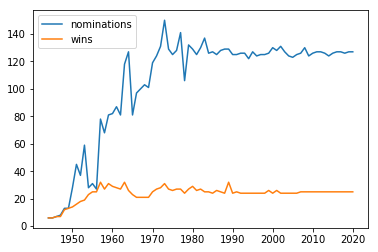

In [12]:
df_year = pd.DataFrame()
df_year['total_nominations'] = df.groupby(['year_award'])['win'].count()
df_year['wins'] = df.groupby(['year_award'])['win'].sum()

plt.plot(df_year.index, df_year['total_nominations'], label = 'nominations')
plt.plot(df_year.index, df_year['wins'], label = 'wins')
plt.legend()

plt.show()

Number of nominations has increased to close to 130 per year, and number of wins stayes at ~25

### Nominees who won at least 5 awards

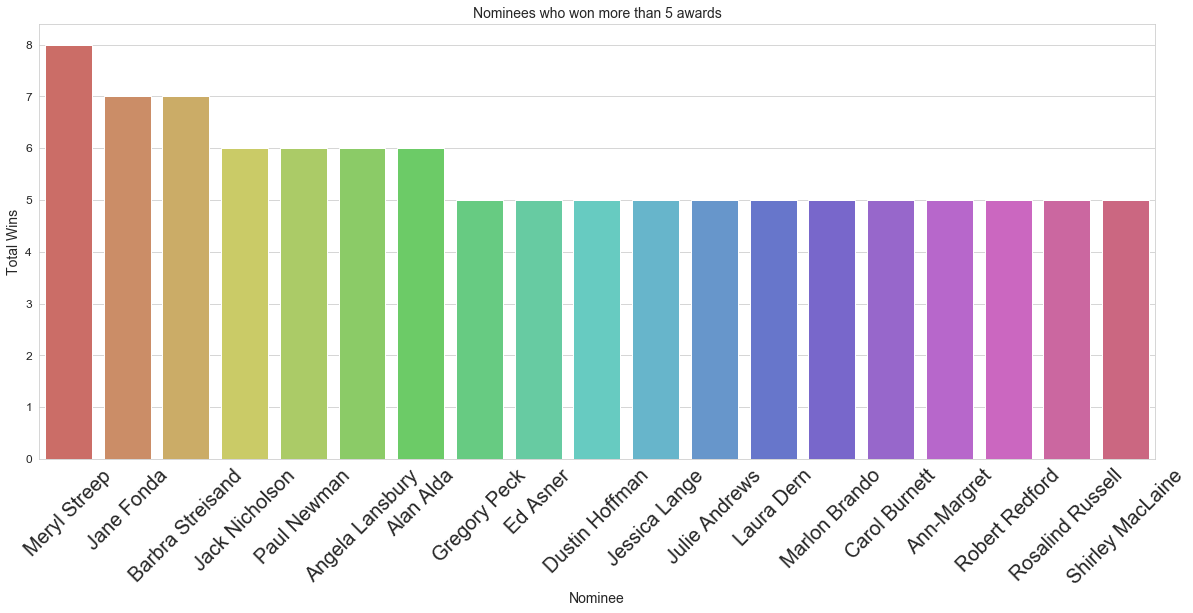

In [16]:
more_5_win = df.groupby('nominee')['win'].sum()
more_5_win = more_5_win.reset_index()
more_5_win = more_5_win[more_5_win['win'] >= 5].sort_values(ascending=False, by='win')

# print('There are ', more_5_win['win'].count(), 'nominees who won more than 5 awards')
plt.figure(figsize=(20,8))
sns.set_style('whitegrid')
sns.barplot(x='nominee', y='win', data=more_5_win, palette='hls')
plt.title('Nominees who won more than 5 awards', fontsize=14)
plt.xlabel('Nominee', fontsize=14)
plt.ylabel('Total Wins', fontsize=14)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=12)
plt.show()

### Nominees who were nominated more than 15 times

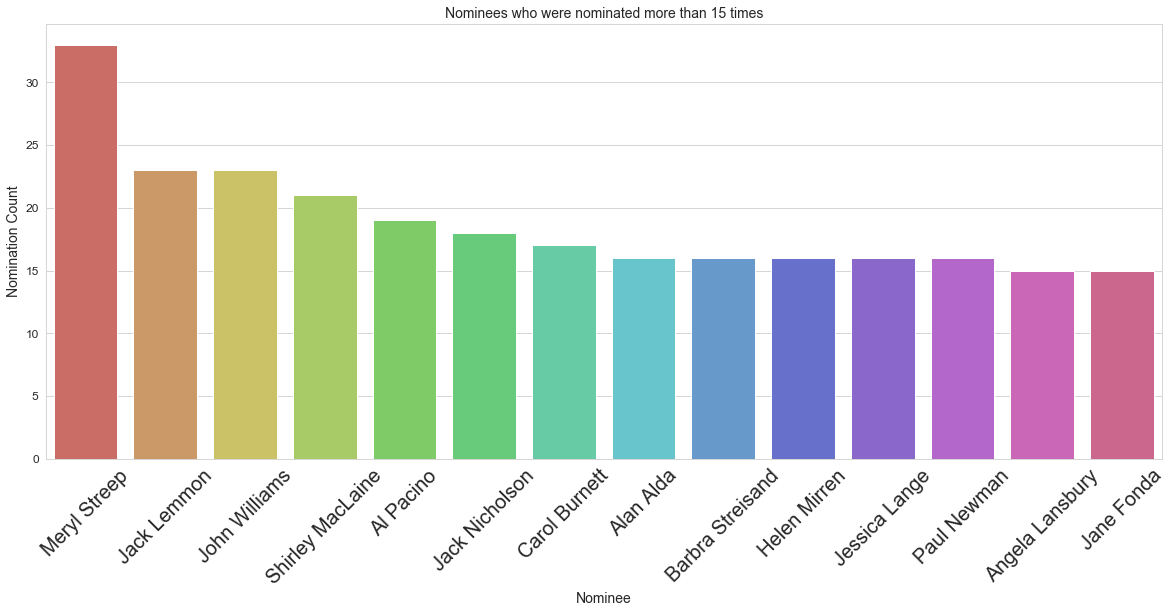

In [17]:
more_15_nominated = df.groupby('nominee')['win'].count()
more_15_nominated = more_15_nominated.reset_index()
more_15_nominated = more_15_nominated[more_15_nominated['win'] >= 15].sort_values(ascending=False, by='win')

# top_10_nominated
plt.figure(figsize=(20,8))
sns.set_style('whitegrid')
sns.barplot(x='nominee', y='win', data=more_15_nominated, palette='hls')
plt.title('Nominees who were nominated more than 15 times', fontsize=14)
plt.xlabel('Nominee', fontsize=14)
plt.ylabel('Nomination Count', fontsize=14)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=12)
plt.show()

### Films/TV shows that have won at least 5 awards

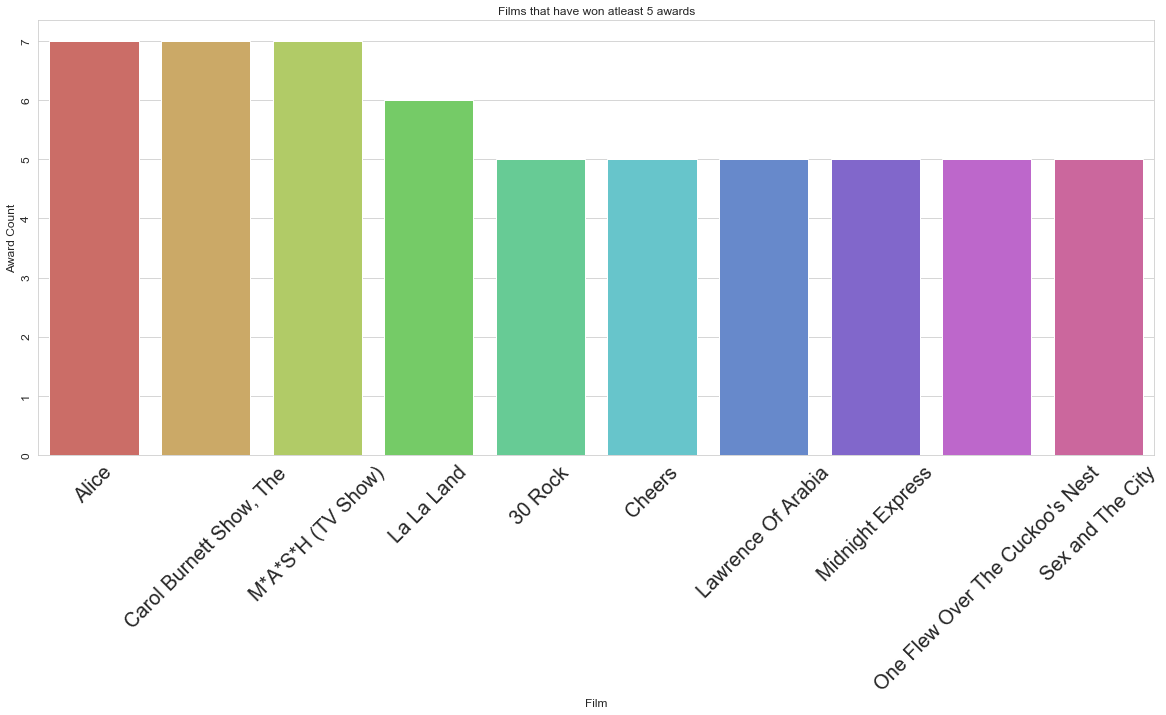

In [19]:
more_5_films = df.groupby('film')['win'].sum()
more_5_films = more_5_films.reset_index()
more_5_films = more_5_films[more_5_films['win'] >= 5].sort_values(ascending=False, by='win')

plt.figure(figsize=(20,8))
sns.set_style('whitegrid')
sns.barplot(x='film', y='win', data=more_5_films, palette='hls')
plt.title('Films that have won atleast 5 awards', fontsize=12)
plt.xlabel('Film', fontsize=12)

plt.ylabel('Award Count', fontsize=12)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(rotation=90, fontsize=12)
plt.show()

### Film that has won most awards/nominations in a single year

In [25]:
film_awards_year = df.groupby(['film', 'year_award'])['win'].sum()
pd.DataFrame(film_awards_year[film_awards_year == film_awards_year.max()])

,,win
film,year_award,
La La Land,2017,6.0


In [26]:

film_nominations = df.groupby(['film', 'year_award'])['win'].count()
pd.DataFrame(film_nominations[film_nominations == film_nominations.max()]).reset_index()

,film,year_award,win
0,Nashville,1976,10


La La Land has won 6 awards in 2017, wow! And Nashville has scored 10 nominations in 1976, that is impressive!

### Films that won at least four awards in a single year

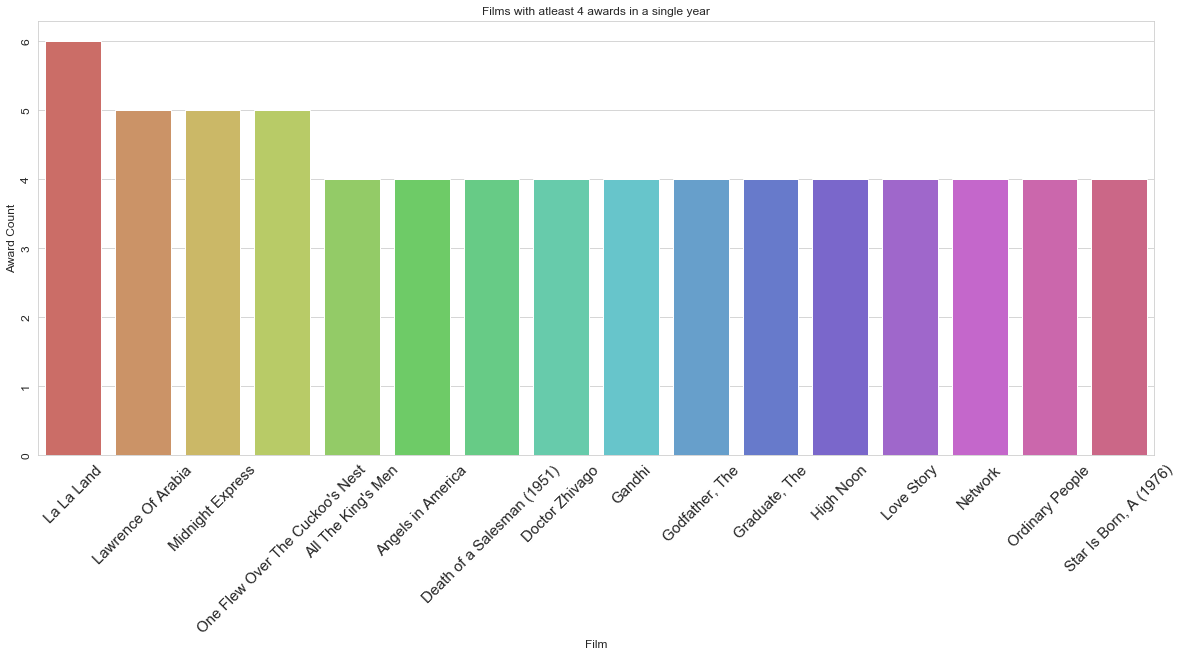

In [23]:
film_award_df = pd.DataFrame(film_awards_year).reset_index()
film_four_awards = film_award_df[film_award_df['win'] >= 4].sort_values(ascending = False, by='win')


plt.figure(figsize=(20,8))
sns.set_style('whitegrid')
sns.barplot(x='film', y='win', data=film_four_awards, palette='hls')
plt.title('Films with atleast 4 awards in a single year', fontsize=12)
plt.xlabel('Film', fontsize=12)
plt.ylabel('Award Count', fontsize=12)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(rotation=90, fontsize=12)
plt.show()


### Most nominated directors in the Motion Picture category

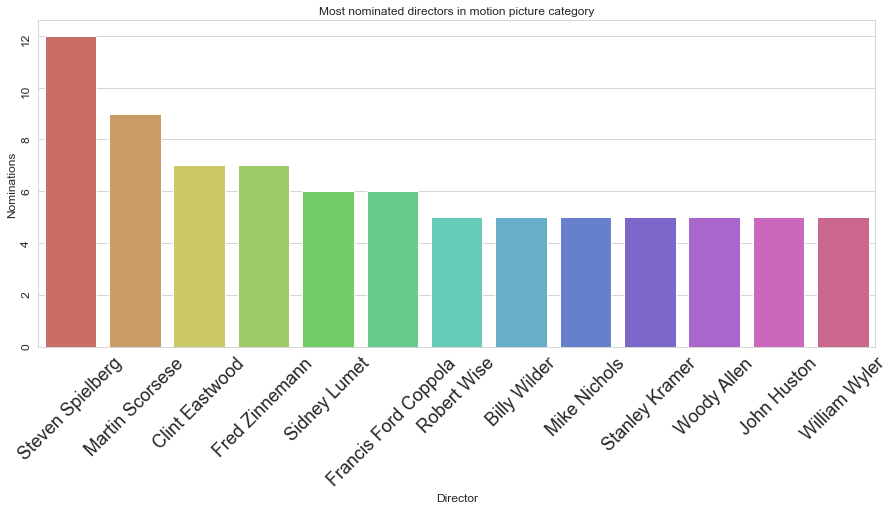

In [28]:
director_motion_picture = df[df['category'].str.contains('Best Director - Motion Picture')]
director_motion_picture = director_motion_picture.groupby('nominee')['win'].count().reset_index().sort_values(ascending=False, by='win')
director_motion_picture = director_motion_picture[director_motion_picture['win'] >= 5]
# director_motion_picture

plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
sns.barplot(x='nominee', y='win', data=director_motion_picture, palette='hls')
plt.title('Most nominated directors in motion picture category', fontsize=12)
plt.xlabel('Director', fontsize=12)

plt.ylabel('Nominations', fontsize=12)
plt.xticks(rotation=45, fontsize=18)
plt.yticks(rotation=90, fontsize=12)
plt.show()